# 5) Baseline DTW Evaluation

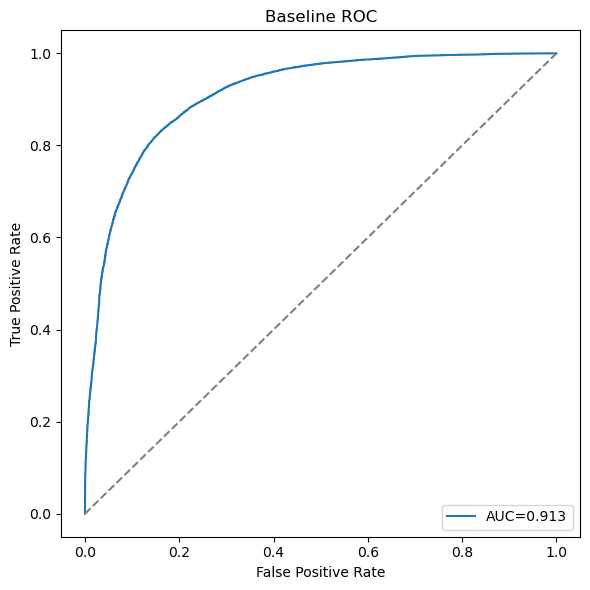

✅ Saved ROC curve to c:\Users\mattt\Skripsie\Projects\DTW-project\figures\baseline_roc.png


In [1]:
# %%
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# make sure `src/` is importable
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# import our new evaluation functions
from src.evaluation.evaluation import (
    load_results,
    compute_metrics,
    plot_roc,
    plot_det,
    save_metrics,
)

# paths
PAIRS_PATH   = project_root / "data" / "pairs_meta.parquet"
CACHE_PATH   = project_root / "data" / "dtw_cache.parquet"
FIGURES_DIR  = project_root / "figures"
RESULTS_DIR  = project_root / "results"
FIGURES_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

# %%  
# 5.1) Load & merge
df = load_results(PAIRS_PATH, CACHE_PATH)

# 5.1.1) polarity inversion
df["score"] = -df["d_raw"]

# 5.2) Compute metrics
m = compute_metrics(df, score_col="score", label_col="label")

# 5.3) Plot, show, then save ROC
fig, ax = plt.subplots(figsize=(6,6))
plot_roc(m["fpr"], m["tpr"], m["auc"], ax=ax)
ax.set_title("Baseline ROC")
plt.tight_layout()
plt.show()                     # ← this actually renders the figure inline
roc_path = FIGURES_DIR / "baseline_roc.png"
fig.savefig(roc_path, dpi=300, bbox_inches="tight")
plt.close(fig)
print(f"✅ Saved ROC curve to {roc_path}")

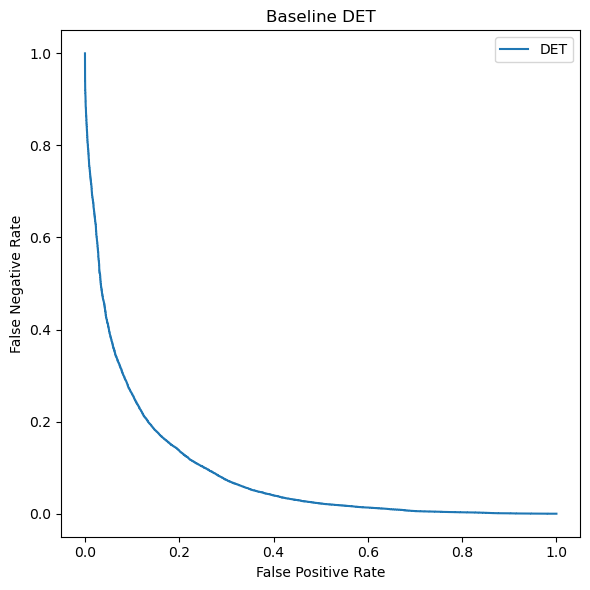

✅ Saved DET curve to c:\Users\mattt\Skripsie\Projects\DTW-project\figures\baseline_det.png


In [2]:
# 5.4) Plot, show, then save DET
fig, ax = plt.subplots(figsize=(6,6))
plot_det(m["fpr"], 1 - m["tpr"], ax=ax)
ax.set_title("Baseline DET")
plt.tight_layout()
plt.show()                     # ← render inline
det_path = FIGURES_DIR / "baseline_det.png"
fig.savefig(det_path, dpi=300, bbox_inches="tight")
plt.close(fig)
print(f"✅ Saved DET curve to {det_path}")

In [3]:
# 5.5) Save scalar metrics
scalar_metrics = {
    "AUC":            float(m["auc"]),
    "EER":            float(m["eer"]),
    "EER_threshold":  float(m["eer_threshold"])
}
save_metrics(scalar_metrics, RESULTS_DIR / "baseline_metrics.json")

In [4]:
# 5.6) Display summary
print(f"AUC: {m['auc']:.4f}")
print(f"EER: {m['eer']:.4f}  @ threshold {m['eer_threshold']:.5f}")

pd.DataFrame([scalar_metrics])

AUC: 0.9127
EER: 0.1651  @ threshold -54.27607


,AUC,EER,EER_threshold
0,0.912731,0.165104,-54.276071
